In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data = pd.read_csv('~/Galvanize/analytics-capstone/data/spotify_data.csv')

In [3]:
data.head()




,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,popularity
0,0,0.05550,https://api.spotify.com/v1/audio-analysis/3Wib...,0.746,304227,0.978,3WibbMr6canxRJXhNtAvLU,0.000040,9,0.0260,-5.324,1,0.0978,153.897,4,https://api.spotify.com/v1/tracks/3WibbMr6canx...,audio_features,spotify:track:3WibbMr6canxRJXhNtAvLU,0.652,61
1,1,0.14800,https://api.spotify.com/v1/audio-analysis/2Ud3...,0.701,462267,0.788,2Ud3deeqLAG988pfW0Kwcl,0.625000,2,0.0977,-5.611,1,0.0425,142.584,4,https://api.spotify.com/v1/tracks/2Ud3deeqLAG9...,audio_features,spotify:track:2Ud3deeqLAG988pfW0Kwcl,0.795,61
2,2,0.02600,https://api.spotify.com/v1/audio-analysis/6Rzg...,0.447,225160,0.868,6RzgLIPAL0ikigYa3ufujc,0.000003,2,0.7300,-4.875,1,0.2340,85.873,4,https://api.spotify.com/v1/tracks/6RzgLIPAL0ik...,audio_features,spotify:track:6RzgLIPAL0ikigYa3ufujc,0.420,44
3,3,0.00249,https://api.spotify.com/v1/audio-analysis/5IVu...,0.646,236133,0.770,5IVuqXILoxVWvWEPm82Jxr,0.000000,2,0.0715,-6.596,0,0.2260,99.165,4,https://api.spotify.com/v1/tracks/5IVuqXILoxVW...,audio_features,spotify:track:5IVuqXILoxVWvWEPm82Jxr,0.681,78
4,4,0.01930,https://api.spotify.com/v1/audio-analysis/0DiW...,0.611,320357,0.697,0DiWol3AO6WpXZgp0goxAV,0.000000,2,0.3320,-8.618,1,0.1330,122.752,4,https://api.spotify.com/v1/tracks/0DiWol3AO6Wp...,audio_features,spotify:track:0DiWol3AO6WpXZgp0goxAV,0.476,75


In [4]:
data.shape


(2535, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 20 columns):
Unnamed: 0          2535 non-null int64
acousticness        2535 non-null float64
analysis_url        2535 non-null object
danceability        2535 non-null float64
duration_ms         2535 non-null int64
energy              2535 non-null float64
id                  2535 non-null object
instrumentalness    2535 non-null float64
key                 2535 non-null int64
liveness            2535 non-null float64
loudness            2535 non-null float64
mode                2535 non-null int64
speechiness         2535 non-null float64
tempo               2535 non-null float64
time_signature      2535 non-null int64
track_href          2535 non-null object
type                2535 non-null object
uri                 2535 non-null object
valence             2535 non-null float64
popularity          2535 non-null int64
dtypes: float64(9), int64(6), object(5)
memory usage: 396.2+ KB


In [6]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,291.898619,0.228151,0.598286,2.712393e+05,0.667125,0.165190,5.312032,0.180037,-8.096333,0.611834,0.086367,120.149125,3.942801,0.531873,38.189349
std,270.734861,0.272079,0.172141,1.375453e+05,0.195525,0.305357,3.627059,0.146638,4.024164,0.487429,0.085885,26.209759,0.332830,0.244126,29.192643
min,0.000000,0.000002,0.076600,3.997300e+04,0.024200,0.000000,0.000000,0.009970,-29.986000,0.000000,0.022800,60.684000,1.000000,0.028400,0.000000
25%,72.000000,0.020900,0.485000,2.022630e+05,0.549500,0.000000,2.000000,0.088800,-10.219500,0.000000,0.037350,100.007000,4.000000,0.350000,10.000000
50%,203.000000,0.103000,0.617000,2.339020e+05,0.693000,0.000245,5.000000,0.120000,-7.074000,1.000000,0.052000,119.983000,4.000000,0.541000,35.000000
75%,414.000000,0.349000,0.726500,2.919465e+05,0.820000,0.117000,8.000000,0.228500,-5.189000,1.000000,0.090400,133.952500,4.000000,0.730000,67.000000
max,1009.000000,0.995000,0.967000,1.967427e+06,0.999000,0.996000,11.000000,0.984000,0.485000,1.000000,0.792000,210.002000,5.000000,0.977000,99.000000


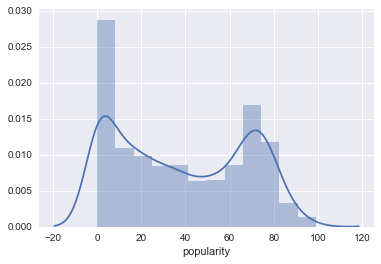

In [7]:
sns.distplot(data['popularity']);

In [8]:
(data['popularity'] < 1).sum()


336

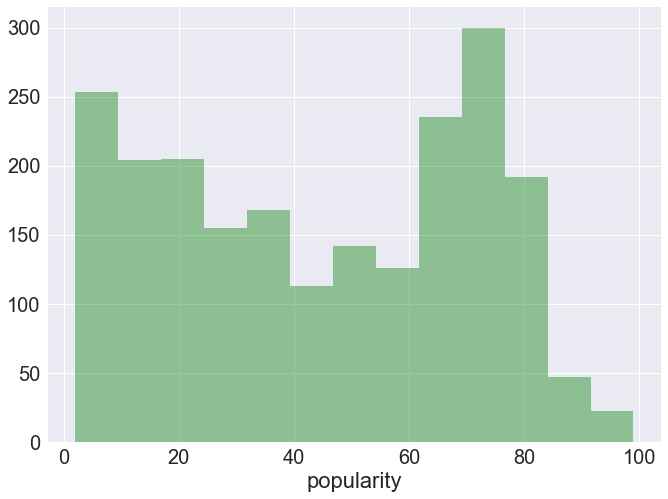

In [9]:
drop_zeros = data[data['popularity'] > 1]
sns.set(font_scale=2)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
plot = sns.distplot(drop_zeros['popularity'], kde=False, rug=False, color='green')
plt.savefig('popularity_hist.png')
plt.show()




### Get Features + Targets


In [10]:
X = drop_zeros[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]
y = drop_zeros['popularity']

In [11]:
X.shape, y.shape



((2162, 13), (2162,))

In [12]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.05550,0.746,304227,0.978,0.000040,9,0.0260,-5.324,1,0.0978,153.897,4,0.652
1,0.14800,0.701,462267,0.788,0.625000,2,0.0977,-5.611,1,0.0425,142.584,4,0.795
2,0.02600,0.447,225160,0.868,0.000003,2,0.7300,-4.875,1,0.2340,85.873,4,0.420
3,0.00249,0.646,236133,0.770,0.000000,2,0.0715,-6.596,0,0.2260,99.165,4,0.681
4,0.01930,0.611,320357,0.697,0.000000,2,0.3320,-8.618,1,0.1330,122.752,4,0.476


In [13]:
X.nunique()

acousticness        1343
danceability         648
duration_ms         1942
energy               703
instrumentalness    1157
key                   12
liveness             811
loudness            1864
mode                   2
speechiness          818
tempo               1986
time_signature         4
valence              851
dtype: int64

In [14]:
X.shape

(2162, 13)

In [15]:
keys = pd.get_dummies(X['key'])

In [16]:
keys.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [17]:
X = pd.concat([X, keys], axis=1)

In [18]:
X.columns

Index([    'acousticness',     'danceability',      'duration_ms',
                 'energy', 'instrumentalness',              'key',
               'liveness',         'loudness',             'mode',
            'speechiness',            'tempo',   'time_signature',
                'valence',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11],
      dtype='object')

In [19]:
mode = pd.get_dummies(X['mode'])

In [20]:
mode = mode.rename(columns=({0: "is_minor", 1: "is_major"}))

In [21]:
X = pd.concat([X, mode], axis=1)

In [22]:
time_sig = pd.get_dummies(X['time_signature'])

In [23]:
time_sig = time_sig.rename(index = int, columns={1: "time_sig_1", 3: "time_sig_3", 4: "time_sig_4", 5:"time_sig_5"})

In [24]:
time_sig.index

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   11,
            ...
            2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534],
           dtype='int64', length=2162)

In [25]:
X = pd.concat([X, time_sig], axis=1)


In [26]:
X.shape

(2162, 31)

In [27]:
## Make a DataFrame for Plotting Purposes

In [28]:
dataframe = pd.DataFrame(X)

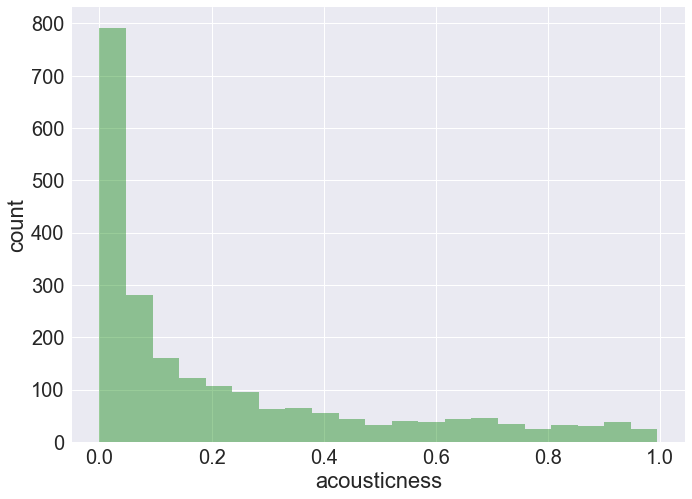

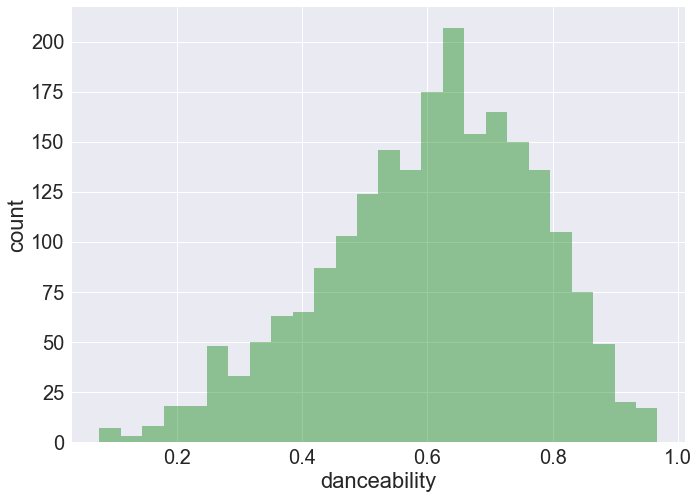

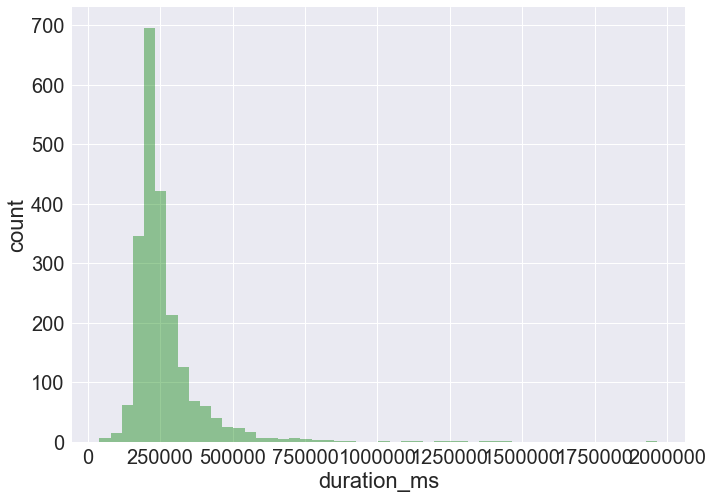

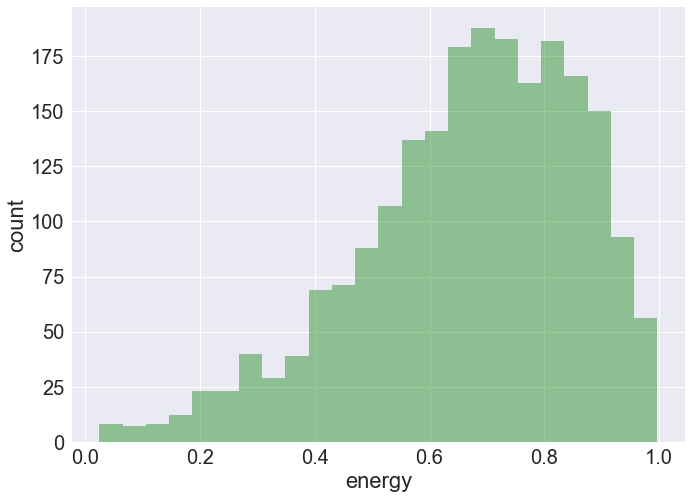

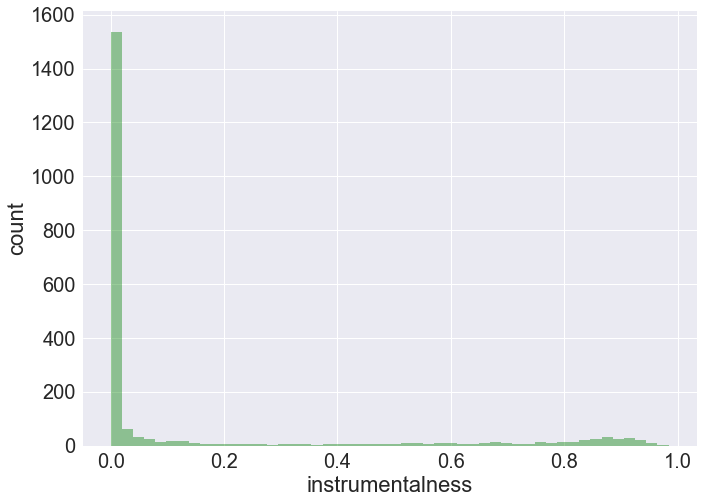

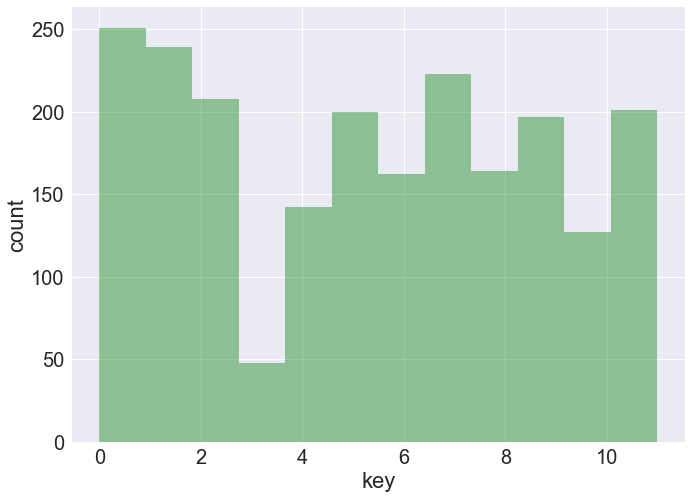

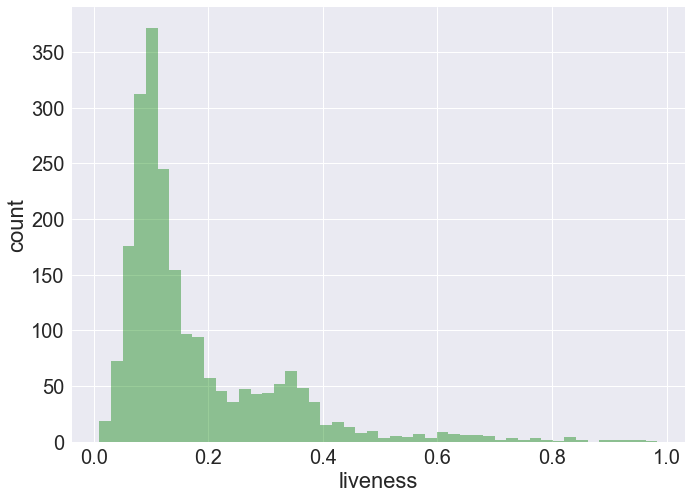

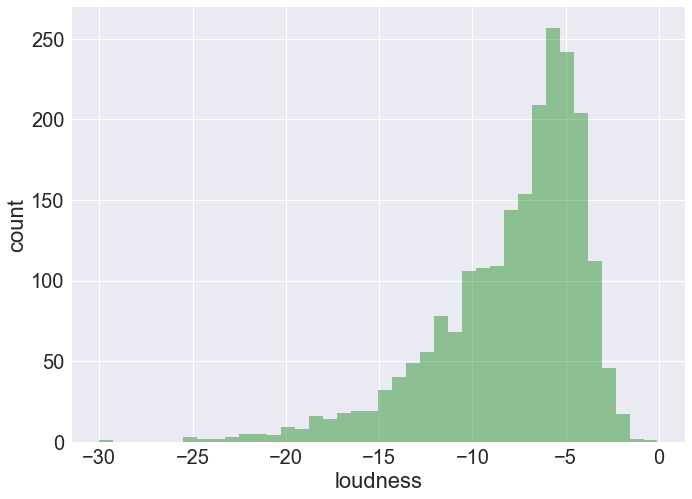

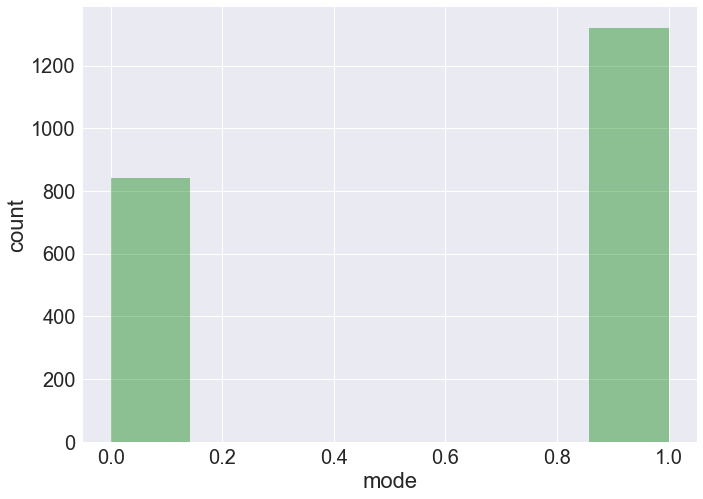

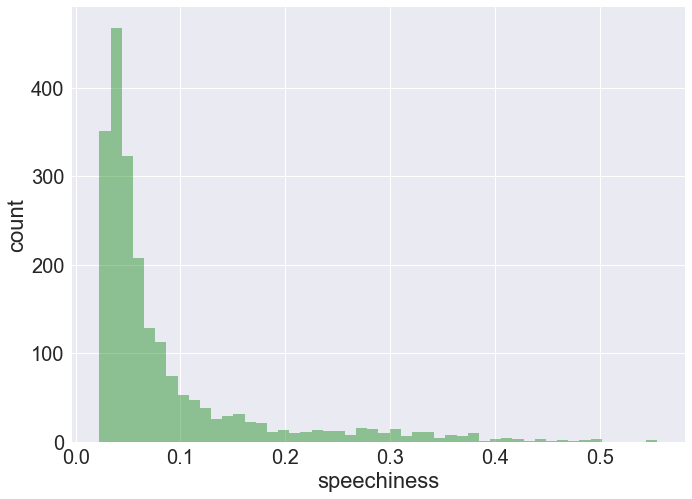

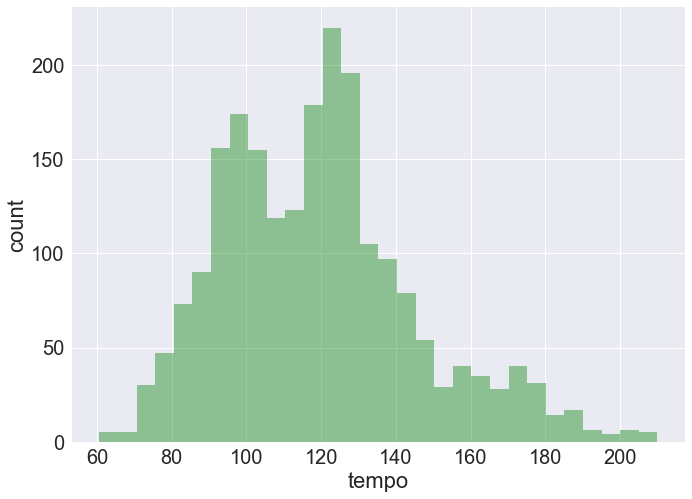

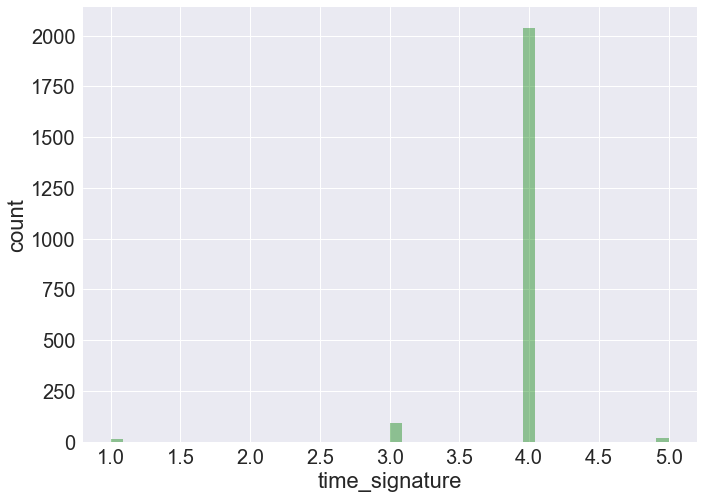

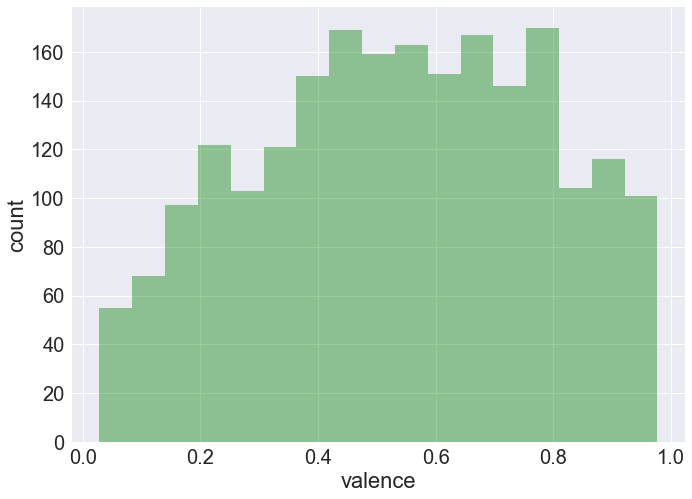

In [29]:
sns.set(font_scale=2)
for i in dataframe[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]: 
    fig, ax = plt.subplots()
    fig.set_size_inches(11, 8)
    plt.xlabel(i)
    plt.ylabel('count')
    sns.distplot(dataframe[i], kde=False, color='green')
    filename = i + '_plt.png'
    plt.savefig(filename)
    plt.show()

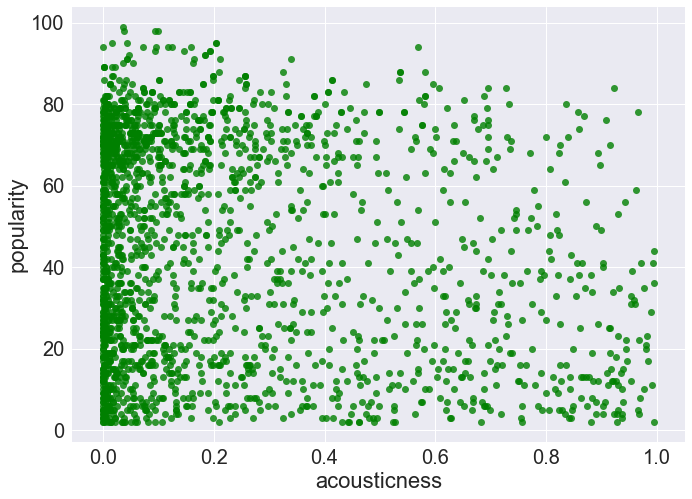

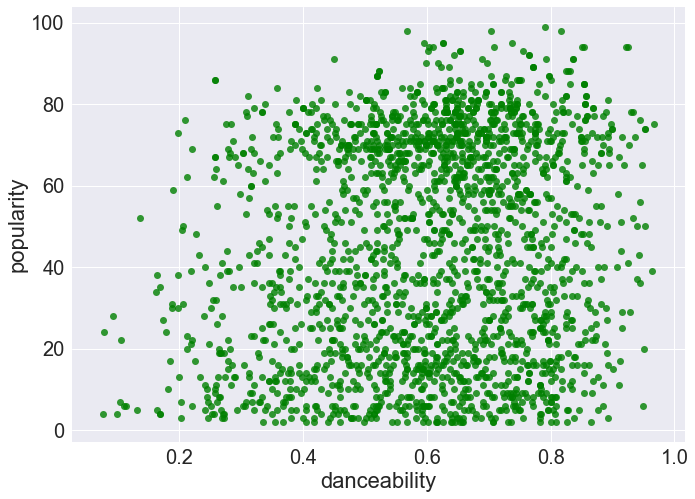

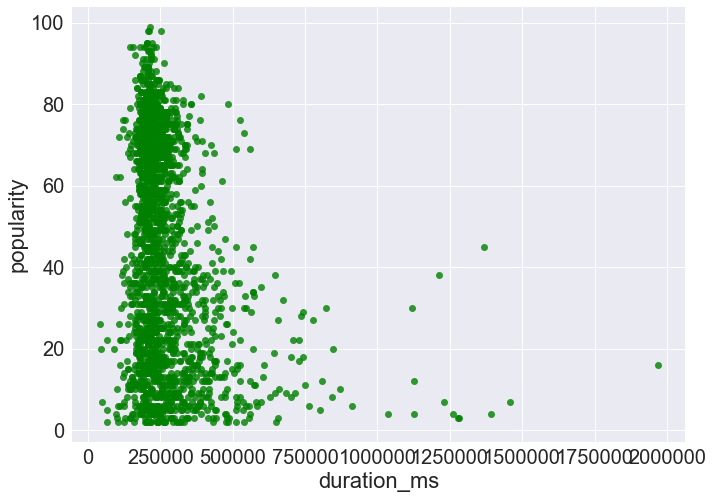

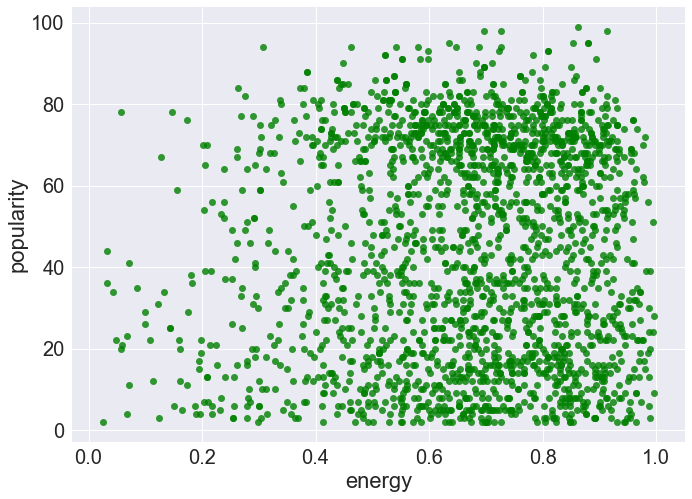

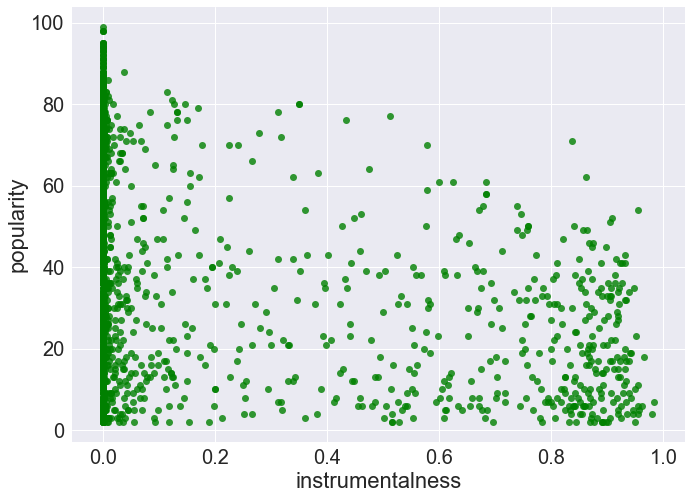

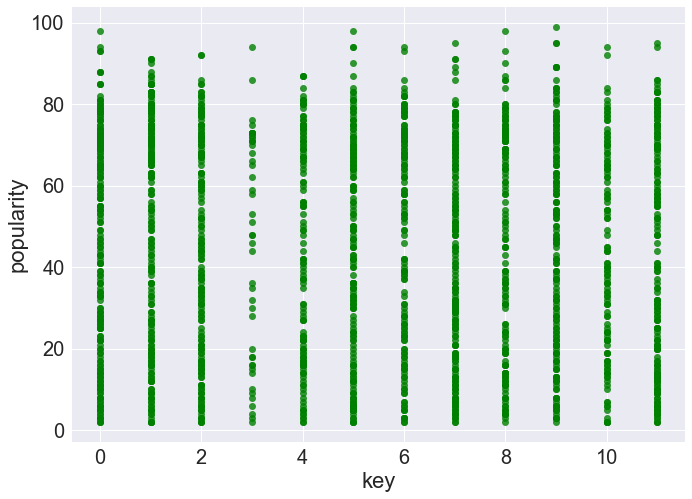

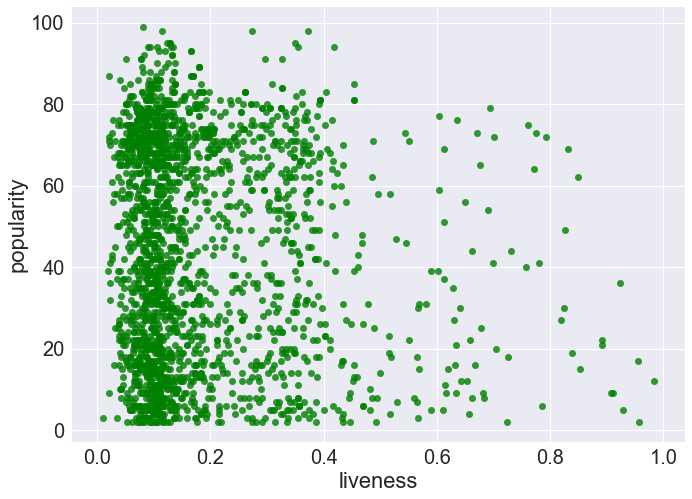

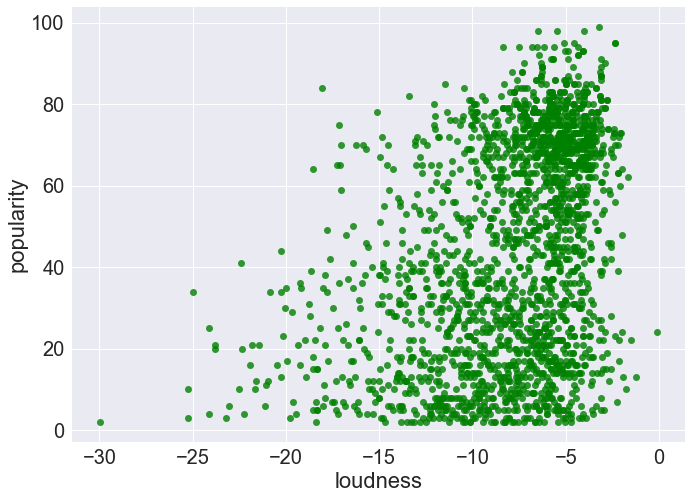

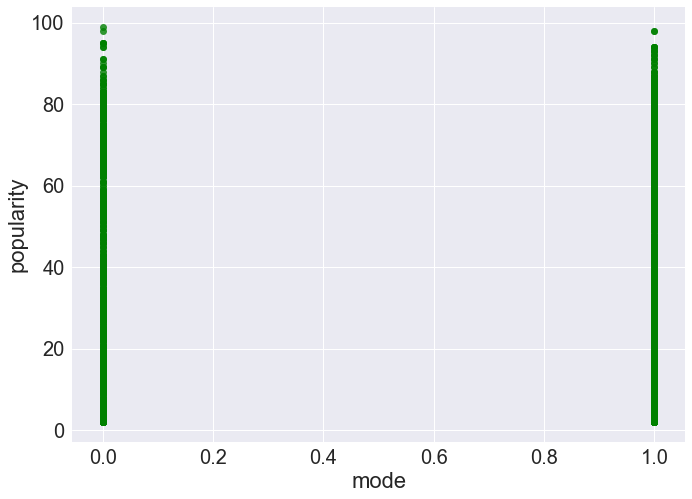

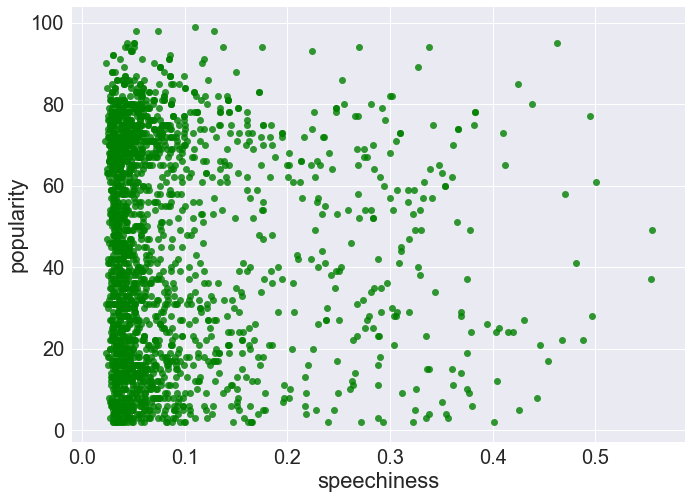

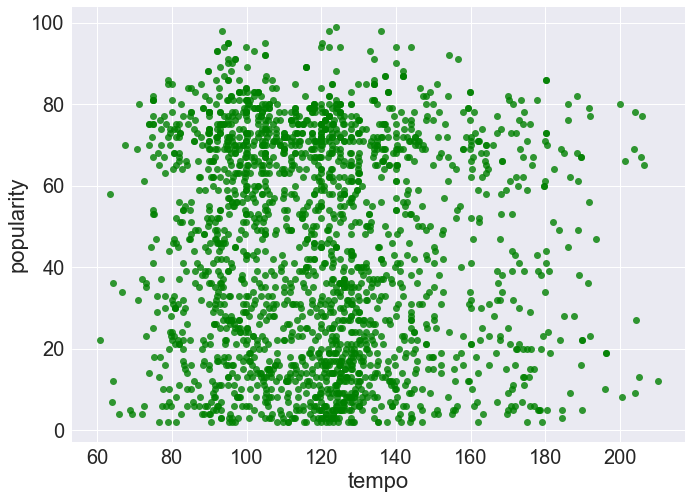

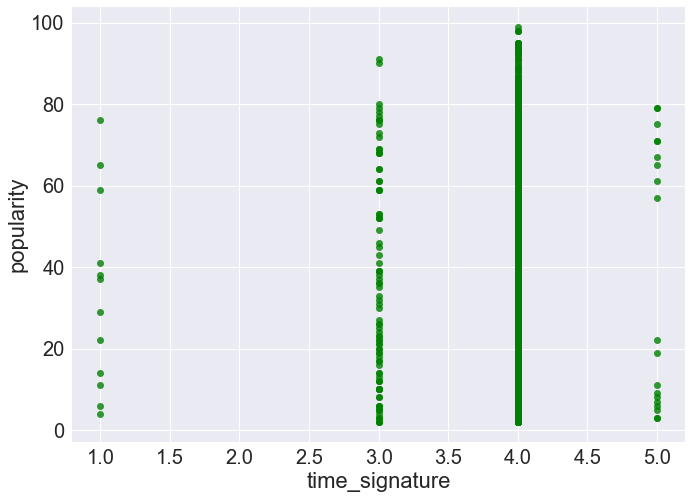

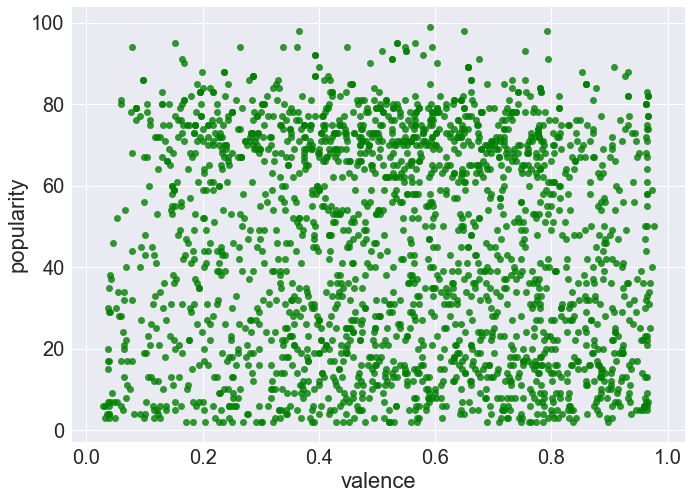

In [30]:
for i in dataframe[['acousticness', 'danceability',
       'duration_ms', 'energy','instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']]: 
    fig, ax = plt.subplots()
    fig.set_size_inches(11, 8)
    sns.regplot(dataframe[i], y, fit_reg=False, color="green")
    plt.xlabel(i)
    plt.ylabel('popularity')
    filename = i + '_scatter_plt.png'
    plt.savefig(filename)
    plt.show()

### How do "popular" songs differ from all songs?
Popular here defined as more popular than the mean popularity


In [151]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)

In [214]:
popular_songs = drop_zeros[drop_zeros['popularity'] > drop_zeros['popularity'].mean()]
all_songs = drop_zeros
most_popular_songs = drop_zeros[drop_zeros['popularity'] > drop_zeros['popularity'].quantile(.9)]

In [216]:
most_popular_songs.popularity.mean()

84.03141361256544

In [110]:
mean_popularity = popular_songs.popularity.mean()
print(mean_popularity)

68.19034608378871


In [217]:
list_of_fields = ['acousticness', 'danceability',
        'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']

popular_songs_for_plotting = popular_songs[list_of_fields]
all_songs_for_plotting = all_songs[list_of_fields]
most_pop_for_plotting = most_popular_songs[list_of_fields]

In [34]:
#plot a bar graph of popular song attribute mean vs. all song attribute mean

In [291]:
y_pop = popular_songs_for_plotting.mean()
y_all = all_songs_for_plotting.mean()
y_most_pop = most_pop_for_plotting.mean()

In [393]:
means = pd.concat([y_pop, y_all], axis=1)
means = means.rename(columns={0: "popular", 1: "all"})
means = pd.concat([means, y_most_pop], axis=1)
means = means.rename(columns={0: "most_pop"})


Index(['popular', 'all', 'most_pop'], dtype='object')

,level_0,index,popular,all,most_pop
0,0,acousticness,0.175034,0.219475,0.182063
1,1,danceability,0.630509,0.605443,0.658822
2,2,energy,0.684337,0.670556,0.654623
3,3,instrumentalness,0.033940,0.142646,0.007851
4,4,key,5.099271,5.303423,4.869110
5,5,liveness,0.168273,0.178282,0.164044
6,6,loudness,-6.406733,-7.888483,-5.825209
7,7,mode,0.640255,0.611008,0.581152
8,8,speechiness,0.082076,0.085423,0.084218
9,9,tempo,117.818586,119.596402,116.546225


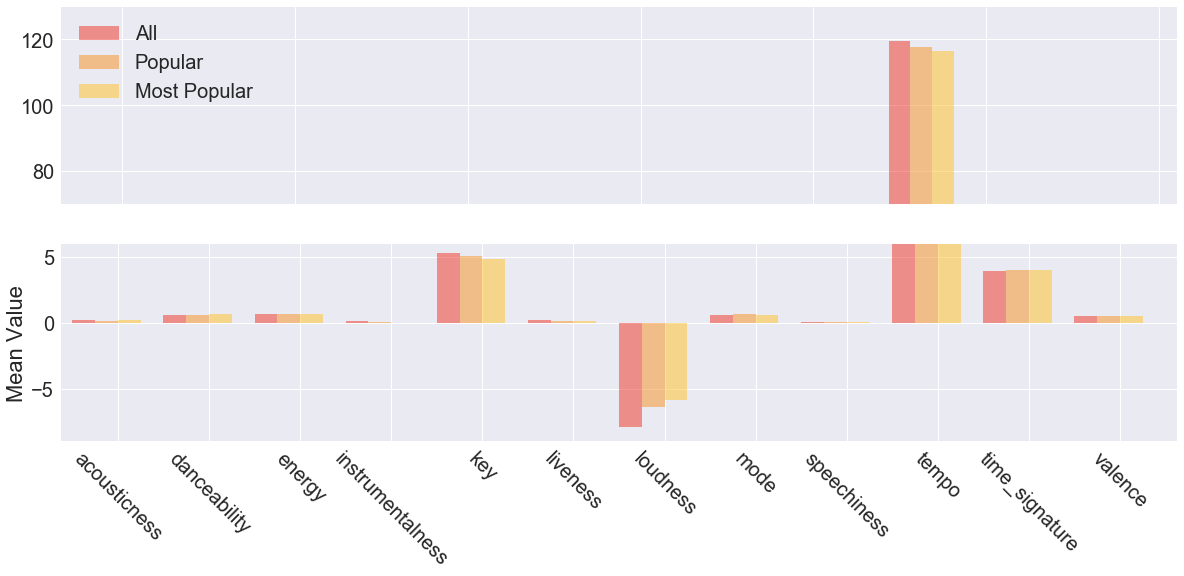

In [492]:

# Setting the positions and width for the bars
pos = list(range(len(means['index']))) 
width = 0.25 
    
# Plotting the bars
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20,8))

# Create a bar with all song data
# in position pos,
ax.bar(pos, 
        #using means['all'] data,
        means['all'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in index
        label=means['all'][0]) 

# Create a bar with the popular song data,
# in position pos + some width buffer,
ax.bar([p + width for p in pos], 
        #using means['popular'] data,
        means['popular'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in index
        label=means['popular'][1]) 

# Create a bar with most popular data,
# in position pos + some width buffer,
ax.bar([p + width*2 for p in pos], 
        #using means['popular'] data,
        means['most_pop'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in index
        label=means['most_pop'][2]) 

# Create a bar with all song data
# in position pos,
ax2.bar(pos, 
        #using means['all'] data,
        means['all'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in index
        label=means['all'][0]) 

# Create a bar with the popular song data,
# in position pos + some width buffer,
ax2.bar([p + width for p in pos], 
        #using means['popular'] data,
        means['popular'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in index
        label=means['popular'][1]) 

# Create a bar with most popular data,
# in position pos + some width buffer,
ax2.bar([p + width*2 for p in pos], 
        #using means['popular'] data,
        means['most_pop'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in index
        label=means['most_pop'][2]) 

# Set the y axis label
ax2.set_ylabel('Mean Value')

# Set the chart's title
# ax.set_title('Test Subject Scores')

#set the lims
ax.set_ylim(70, 130)  # outliers only
ax2.set_ylim(-9, 6)  # most of the data

# Set the position of the x ticks
ax2.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax2.set_xticklabels(means['index'], rotation=-45)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

#hide the spines
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Adding the legend and showing the plot
ax.legend(['All', 'Popular', 'Most Popular'], loc='upper left')
plt.show()



acousticness       -0.044441
danceability        0.025066
energy              0.013781
instrumentalness   -0.108705
key                -0.204151
liveness           -0.010009
loudness            1.481750
mode                0.029247
speechiness        -0.003347
tempo              -1.777817
time_signature      0.020810
valence            -0.009935
dtype: float64


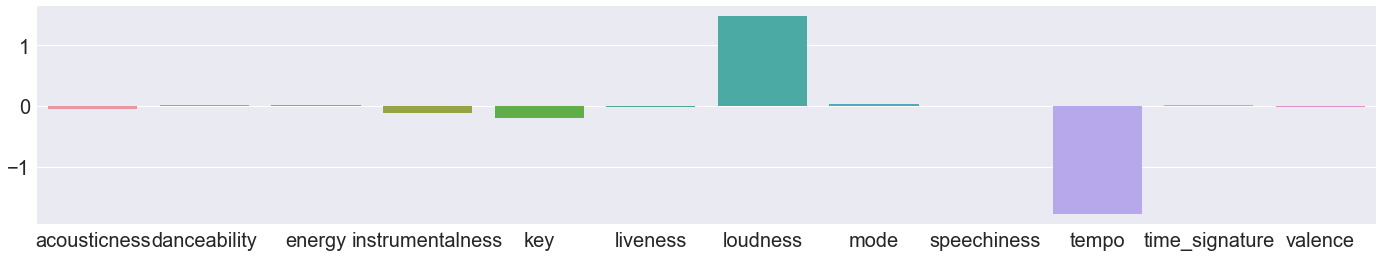

In [311]:
diff_popular = (y_pop - y_all)
x=list(diff_popular.index)
y = diff_popular.values
print(diff_popular)
#plot the difference from all songs to the popular songs
fig, ax = plt.subplots()

fig.set_size_inches(24, 4)
sns.barplot(x, y)
plt.savefig('difference_from_all_to_pop.png')

acousticness        0.007029
danceability        0.028313
energy             -0.029713
instrumentalness   -0.026089
key                -0.230161
liveness           -0.004229
loudness            0.581524
mode               -0.059103
speechiness         0.002142
tempo              -1.272360
time_signature      0.018673
valence            -0.027178
dtype: float64


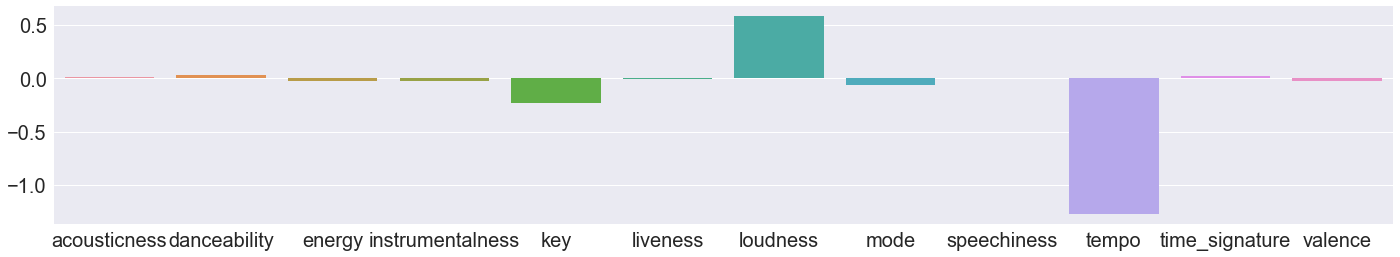

In [312]:
diff_most_from_pop = (y_most_pop - y_pop)
y2 = diff_most_from_pop.values
print(diff_most_from_pop)
#plot the difference from the popular songs to the most popular songs
fig, ax = plt.subplots()
fig.set_size_inches(24, 4)
sns.barplot(x, y2)
plt.savefig('difference_from_pop_to_most_pop.png')